In [2]:
# Installing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import numpy as np

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

dfC = pd.read_csv('C:\\Users\\user\\Downloads\\movies.csv')

In [6]:
dfC.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [3]:
# Checking for missing data
dfC.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
# Dropping rows with null values
df = dfC.dropna(axis=0, subset=['budget','gross','votes', 'rating', 'runtime', 'company'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [5]:
# Let's check if we still have null values
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [6]:
# Changing data type of the budget column and gross column as int
df = df.astype({"budget" : int, "gross" : int})

Now let's extract year from the **special** column.

In [7]:
dfSplit = df['released'].str.split(pat = '(', expand = True)
dfSplit.head()

,0,1
0,"June 13, 1980",United States)
1,"July 2, 1980",United States)
2,"June 20, 1980",United States)
3,"July 2, 1980",United States)
4,"July 25, 1980",United States)


In [8]:
dfDate = dfSplit[0].astype(str).str[-5:-1]
dfDate.head

<bound method NDFrame.head of 0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7648    2020
7649    2020
7650    2020
7651    2020
7652    2020
Name: 0, Length: 5421, dtype: object>

In [9]:
# Let's join the above dataframe with our main dataset
dfC = pd.concat([df, dfDate], axis = 1)
dfC.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,0
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [10]:
# Let's rename columns to have meaningful names
dfC = dfC.rename(columns = {0:'yearcorrect'})
dfC.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [11]:
dfS = dfC.sort_values(by=['gross'], inplace = False, ascending = False)

In [12]:
# Drop any duplicates and outliers;

dfS.drop_duplicates()
dfS = dfS.drop([3045,7445,5445], axis = 0)

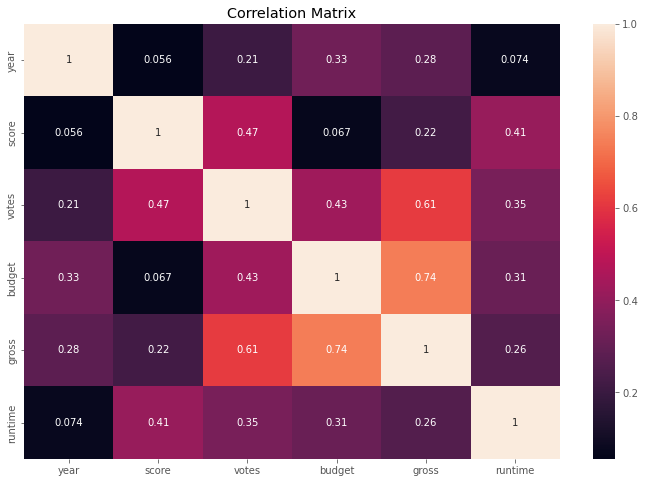

In [13]:
# Now we are going to check for correlation;

# plotting correlation heatmap
dataplot=sns.heatmap(dfS.corr(), annot = True)
plt.title("Correlation Matrix")
  
# displaying heatmap
plt.show()

From the heatmap we can see that **gross** and **budget** are highly correlated with a correlation coefficient of **0.74**.
We will plot a scatter plot to show the correlation graph.

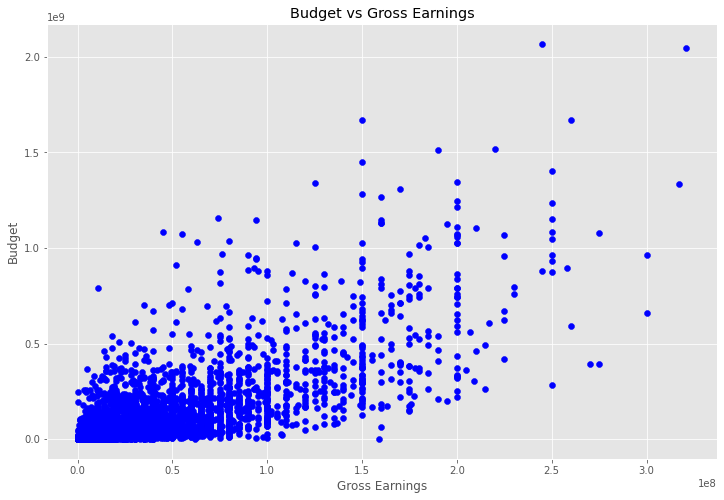

In [14]:
# Scatter plot with budget vs gross

plt.scatter (x = dfS['budget'], y = dfS['gross'], color = 'Blue')
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel ('Budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

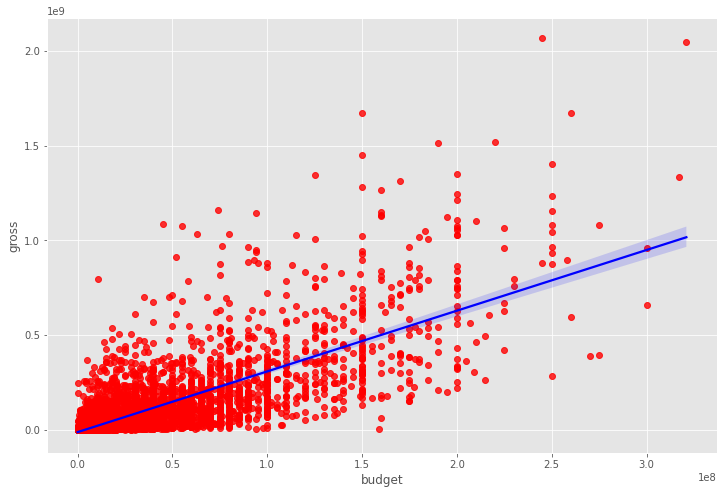

In [15]:
# Lrt's plot the budget vs gross regresion line

sns.regplot(x = 'budget', y = 'gross', data = dfS, scatter_kws = {"color": "red"}, line_kws = {"color":"Blue"})

Now lets see if we can find other strong correlations. We are going to convert some object columns into code. This is necessary for our analysis since the correlation map only works for numerical columns.

In [16]:
dfS_number = dfS

for col_name in dfS_number:
    if (dfS_number [col_name].dtype == 'object'):
        dfS_number[col_name] = dfS_number[col_name].astype('category') 
        dfS_number[col_name] = dfS_number[col_name].cat.codes
        
dfS_number

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,3641,5,0,2015,528,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,35
7244,387,5,0,2018,144,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,38
7480,4386,4,2,2019,1125,6.9,222000.0,1012,1361,457,47,260000000,1670727580,1423,118.0,39
6653,2115,5,0,2015,1302,7.0,593000.0,335,2523,293,47,150000000,1670516444,1397,124.0,35
6043,3876,5,0,2012,1898,8.0,1300000.0,1060,1646,1470,47,220000000,1518815515,983,143.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3792,6,6,2009,889,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,35
2434,2967,5,0,1993,1466,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,14
3681,1593,3,6,2000,1720,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,21
272,2907,6,9,1982,1524,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,2


Now the object columns are now converted into number or code.

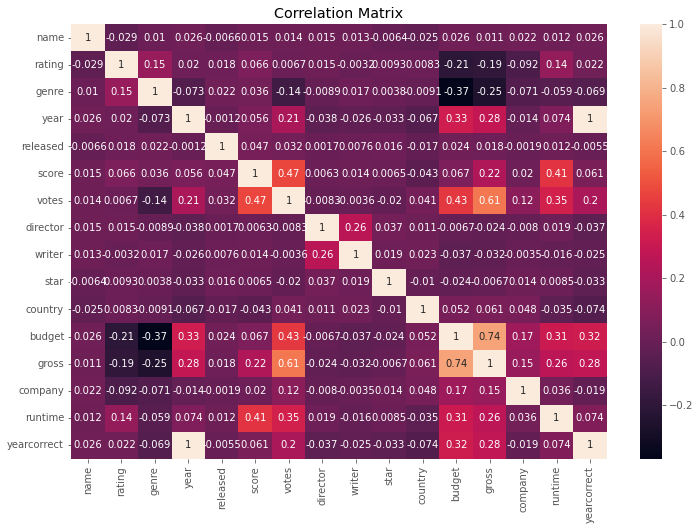

In [17]:
# Now let's plot correlation heatmap again.
dataplot=sns.heatmap(dfS_number.corr(), annot = True)
plt.title("Correlation Matrix")
  
# displaying heatmap
plt.show()

In [18]:
dfS_number.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029317,0.010041,0.026334,-0.006593,0.015062,0.013925,0.014821,0.012562,-0.006365,-0.025411,0.026016,0.011162,0.021761,0.011560,0.026328
rating,-0.029317,1.000000,0.147796,0.019580,0.017957,0.066235,0.006672,0.014561,-0.003229,0.009295,0.008271,-0.205162,-0.190168,-0.092285,0.141883,0.022102
genre,0.010041,0.147796,1.000000,-0.072589,0.021763,0.035701,-0.135750,-0.008950,0.017288,0.003795,-0.009073,-0.369849,-0.252619,-0.071289,-0.058777,-0.068569
year,0.026334,0.019580,-0.072589,1.000000,-0.001223,0.055746,0.205973,-0.037873,-0.025535,-0.032607,-0.066891,0.328175,0.283780,-0.014445,0.074210,0.998725
released,-0.006593,0.017957,0.021763,-0.001223,1.000000,0.047067,0.032279,0.001683,0.007586,0.016275,-0.017016,0.024001,0.018392,-0.001950,0.011608,-0.005485
score,0.015062,0.066235,0.035701,0.055746,0.047067,1.000000,0.473405,0.006277,0.013533,0.006530,-0.043403,0.067334,0.221701,0.020015,0.412577,0.061303
votes,0.013925,0.006672,-0.135750,0.205973,0.032279,0.473405,1.000000,-0.008284,-0.003613,-0.019975,0.040894,0.431864,0.613791,0.117002,0.345443,0.203070
director,0.014821,0.014561,-0.008950,-0.037873,0.001683,0.006277,-0.008284,1.000000,0.261429,0.037028,0.011294,-0.006731,-0.024442,-0.007991,0.019351,-0.036897
writer,0.012562,-0.003229,0.017288,-0.025535,0.007586,0.013533,-0.003613,0.261429,1.000000,0.018857,0.022618,-0.037460,-0.032490,-0.003500,-0.016178,-0.025128
star,-0.006365,0.009295,0.003795,-0.032607,0.016275,0.006530,-0.019975,0.037028,0.018857,1.000000,-0.010146,-0.024360,-0.006696,0.013768,0.008529,-0.033130


In [19]:
correlation_mat = dfS_number.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029317
             genre          0.010041
             year           0.026334
             released      -0.006593
                              ...   
yearcorrect  budget         0.320740
             gross          0.277989
             company       -0.018913
             runtime        0.074460
             yearcorrect    1.000000
Length: 256, dtype: float64

In [20]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.369849
budget       genre         -0.369849
gross        genre         -0.252619
genre        gross         -0.252619
rating       budget        -0.205162
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [21]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross        votes          0.613791
votes        gross          0.613791
budget       gross          0.743536
gross        budget         0.743536
year         yearcorrect    0.998725
yearcorrect  year           0.998725
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

From our analysis we can see that **votes** and **budget** have the highest correlation with **gross earnings**.